In [10]:
import matplotlib.pyplot as plt

import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline

In [5]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

polynomial_features = PolynomialFeatures(degree=2, include_bias=True)
X_polynomial = polynomial_features.fit_transform(X)

linear_regression = LinearRegression()
linear_regression.fit(X, y)


LinearRegression()

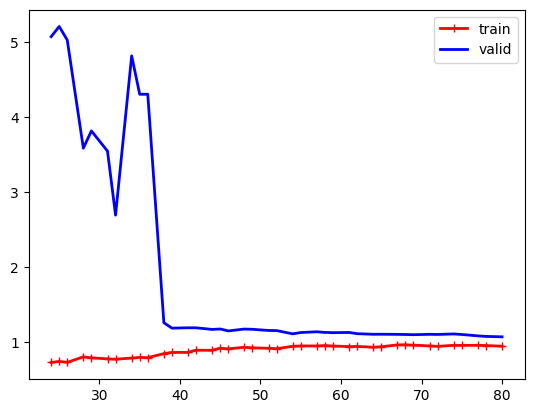

In [14]:
polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=True),
    LinearRegression())


train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, X, y, train_sizes=np.linspace(0.3, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error"
)
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=2, label="valid")
plt.legend()
plt.show()

#### Regularizations

1. Ridge regression - default
2. Lasso regression - when you suspect that some features may be insignificant
3. Elastic regression - linear combination of lasso and ridge resresisons

#### Early stopping

In [17]:
from copy import deepcopy
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor

X_train, y_train, X_valid, y_valid = X[:80], y[:80], X[80:], y[80:]

preprocessing = make_pipeline(PolynomialFeatures(degree=90, include_bias=False), StandardScaler())

X_train_preprocessed = preprocessing.fit_transform(X_train)
X_valid_preprocessed = preprocessing.fit_transform(X_valid)
sgd_regressor = SGDRegressor(penalty=None, eta0=0.002, random_state=42)
n_epochs = 500
best_valid_rmse = float('inf')

for epochs in range(n_epochs):
    sgd_regressor.partial_fit(X_train_preprocessed, y_train)
    y_valid_predict = sgd_regressor.predict(X_valid_preprocessed)
    validation_error = root_mean_squared_error(y_valid, y_valid_predict)
    if validation_error < best_valid_rmse:
        best_valid_rmse = validation_error
        best_model = deepcopy(sgd_regressor)

/home/zhukowych/.virtualenvs/ml/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/zhukowych/.virtualenvs/ml/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/zhukowych/.virtualenvs/ml/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/zhukowych/.virtualenvs/ml/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed w